# GRIP- The Sparks Foundation

### Author
Kavya Parashar

### Batch
December 2020

### Task
Prediction using Supervised ML (Level - Beginner)
Predict the percentage of a student based on the no. of study hours.

## Linear Regression with Support Vector Machine (SVM) using Scikit Learn in Python
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

#### Support Vector Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables using the concept of Support Vectors.

In [1]:
# Importing the libraries required
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading data from remote link
df = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully!")
df.head()

Data imported successfully!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


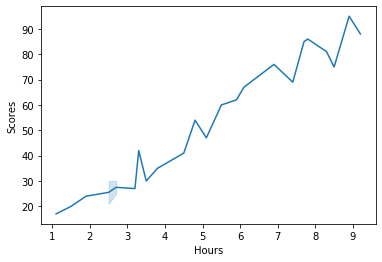

In [4]:
# Visualizing the data
sns.lineplot(x="Hours", y="Scores", data=df)

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score. The bias is high, hence the data should be split into train and test sets.

In [5]:
#Dividing the dependent and independent variable

X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [6]:
#Splitting the data into train set and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [7]:
#Cross checking the split
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [8]:
X_train.shape

(20, 1)

In [9]:
y_test.shape

(5,)

### Training the Algorithm
The data has been split into training and testing sets, and now is finally the time to train the algorithm.

In [10]:
from sklearn.svm import SVR

In [11]:
#Hyperparameter training for best results
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000, 3000],   
              'gamma': [3, 1, 0.1, 0.01, 0.001, 0.0001]}  
  
svr = GridSearchCV(SVR(epsilon=0.01, kernel='linear'), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
svr.fit(X_train, y_train)

print('Training successful!')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=0.1, gamma=3 ..................................................
[CV] ...................... C=0.1, gamma=3, score=0.488, total=   0.0s
[CV] C=0.1, gamma=3 ..................................................
[CV] ...................... C=0.1, gamma=3, score=0.490, total=   0.0s
[CV] C=0.1, gamma=3 ..................................................
[CV] ...................... C=0.1, gamma=3, score=0.060, total=   0.0s
[CV] C=0.1, gamma=3 ..................................................
[CV] ...................... C=0.1, gamma=3, score=0.589, total=   0.0s
[CV] C=0.1, gamma=3 ..................................................
[CV] ...................... C=0.1, gamma=3, score=0.515, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.488, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=1000, gamma=1, score=0.932, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.936, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.897, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.856, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.821, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.932, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.936, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.3s finished


In [12]:
# print best parameter after tuning 
print(svr.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(svr.best_estimator_) 

{'C': 1, 'gamma': 3}
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=3,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [13]:
svr_best = SVR(epsilon=0.01, kernel='linear', C=1, gamma=3)
svr_best.fit(X_train, y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=3,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [14]:
y_pred = svr_best.predict(X_test)

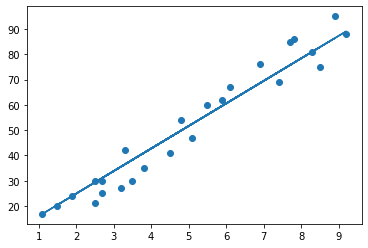

In [15]:
# Plotting the regression line
line = svr_best.coef_*X+svr_best.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Prediction
We shall now use this model on train and test data to predict Scores

In [16]:
y_test_pred = svr_best.predict(X_test)
y_train_pred = svr_best.predict(X_train)

In [17]:
y_test_pred

array([20.42625006, 35.57218767, 72.99156294, 29.33562512, 59.62750034])

In [18]:
# Comparing Actual vs Predicted
confusion_matrix = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})  
confusion_matrix

,Actual,Predicted
0,20,20.426250
1,27,35.572188
2,69,72.991563
3,30,29.335625
4,62,59.627500


In [19]:
# Testing with our own data
hours = 9.25
new_pred = svr_best.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(new_pred[0]))

No of Hours = 9.25
Predicted Score = 89.47390681361817


### **Evaluating the model performance**

The final step is to evaluate the performance of model. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [21]:
mean_squared_error(y_test, y_test_pred)

19.133362768783805

In [22]:
r2_score(y_test, y_test_pred)

0.9517126923864734

In [23]:
mean_absolute_error(y_test, y_test_pred)

3.2053750401299745